## Data description

Your task is to train a model, which will predict churn status of a user.

### Details
- You can implement any steps that you think are necessary in this problem
- You can use any model of your choice
- You need to validate accuracy of the model. You can use any validation technique of your choice. The simplest option is to divide initial data on train and test sets, where train one is used just for fitting of a model and test one - for checking accuracy of a fitted model.

### Attribute information
- Call Failures - number of call failures
- Complains - binary (0: no complains, 1: 1 complaint or more)
- Subscription Length - total months of subscription
- Charge Amount: ordinal attribute (0: lowest amount, 9: highest amount)
- Seconds of Use: total seconds of calls
- Frequency of use: total number of calls
- Frequency of SMS: total number of text messages
- Distinct Called Numbers: total number of distinct phone calls\
This column is not exist - **Age Group**: ordinal attribute, age group user belongs to\
This column is not exist - **Tariff Plan Type**: binary (pay as you go, contractual), type of user's mobile plan\
- Churn: binary (1: churn, 0: non-churn) - Class label

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('technical_task_dataset.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Churn
0,8.0,0.0,38.0,0,4370.0,71.0,5.0,17.0,0
1,0.0,0.0,NaN,0,318.0,5.0,7.0,4.0,0
2,10.0,0.0,37.0,0,2453.0,60.0,359.0,24.0,0
3,10.0,0.0,38.0,0,4198.0,66.0,NaN,35.0,0
4,3.0,0.0,38.0,0,NaN,58.0,NaN,33.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             2524 non-null   float64
 1   Complains                2558 non-null   float64
 2   Subscription Length      2633 non-null   float64
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           2561 non-null   float64
 5   Frequency of use         2479 non-null   float64
 6   Frequency of SMS         2488 non-null   float64
 7   Distinct Called Numbers  2514 non-null   float64
 8   Churn                    3150 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 221.6 KB


In [4]:
data_analys_df = df.dropna()
data_analys_df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Churn
0,8.0,0.0,38.0,0,4370.0,71.0,5.0,17.0,0
2,10.0,0.0,37.0,0,2453.0,60.0,359.0,24.0,0
6,4.0,0.0,38.0,0,2360.0,39.0,285.0,18.0,0
20,7.0,0.0,37.0,1,11465.0,154.0,11.0,47.0,0
24,13.0,1.0,36.0,1,5818.0,98.0,26.0,24.0,1


In [5]:
data_analys_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 3142
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             706 non-null    float64
 1   Complains                706 non-null    float64
 2   Subscription Length      706 non-null    float64
 3   Charge Amount            706 non-null    int64  
 4   Seconds of Use           706 non-null    float64
 5   Frequency of use         706 non-null    float64
 6   Frequency of SMS         706 non-null    float64
 7   Distinct Called Numbers  706 non-null    float64
 8   Churn                    706 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 55.2 KB


In [6]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Churn
count,2524.000000,2558.000000,2633.000000,3150.000000,2561.000000,2479.000000,2488.000000,2514.000000,3150.000000
mean,7.731379,0.076622,32.499810,0.942857,4457.024209,69.052844,73.308682,23.361575,0.157143
std,7.286990,0.266043,8.540095,1.521072,4167.652501,56.910760,112.651426,17.275861,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,29.000000,0.000000,1390.000000,27.000000,6.000000,10.000000,0.000000
50%,6.000000,0.000000,35.000000,0.000000,3018.000000,54.000000,21.000000,21.000000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6458.000000,94.000000,87.250000,33.000000,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,1.000000


In [7]:
data_analys_df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Churn
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,7.678470,0.069405,32.855524,0.885269,4282.563739,68.262040,74.912181,23.011331,0.169972
std,6.857001,0.254322,8.260928,1.351493,4009.338768,56.037102,118.570400,16.923018,0.375874
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1360.750000,27.000000,7.000000,10.000000,0.000000
50%,7.000000,0.000000,35.000000,0.000000,3039.000000,52.500000,21.000000,21.000000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6298.000000,93.000000,81.750000,33.000000,0.000000
max,34.000000,1.000000,47.000000,10.000000,16980.000000,254.000000,498.000000,97.000000,1.000000


In [8]:
new_df = df.copy()

In [9]:
# new_df['Call Failure'] = new_df['Call Failure'].fillna(new_df['Call Failure'].median())
# new_df['Charge Amount'] = new_df['Charge Amount'].fillna(new_df['Charge Amount'].mode())
# new_df['Seconds of Use'] = new_df['Seconds of Use'].fillna(round(new_df['Seconds of Use'].median()))
# new_df['Frequency of use'] = new_df['Frequency of use'].fillna(round(new_df['Frequency of use'].median()))
# new_df['Frequency of SMS'] = new_df['Frequency of SMS'].fillna(round(new_df['Frequency of SMS'].median()))
# new_df['Subscription Length'] = new_df['Subscription Length'].fillna(new_df['Subscription Length'].median())
# new_df['Distinct Called Numbers'] = new_df['Distinct Called Numbers'].fillna(0.0)
# new_df['Complains'] = new_df['Complains'].fillna(0.0)
new_df['Call Failure'] = new_df['Call Failure'].fillna(round(new_df['Call Failure'].mean()))
new_df['Charge Amount'] = new_df['Charge Amount'].fillna(new_df['Charge Amount'].mode())
new_df['Seconds of Use'] = new_df['Seconds of Use'].fillna(round(new_df['Seconds of Use'].mean()))
new_df['Frequency of use'] = new_df['Frequency of use'].fillna(round(new_df['Frequency of use'].mean()))
new_df['Frequency of SMS'] = new_df['Frequency of SMS'].fillna(round(new_df['Frequency of SMS'].median()))
new_df['Subscription Length'] = new_df['Subscription Length'].fillna(new_df['Subscription Length'].median())
new_df['Distinct Called Numbers'] = new_df['Distinct Called Numbers'].fillna(0.0)
new_df['Complains'] = new_df['Complains'].fillna(0.0)

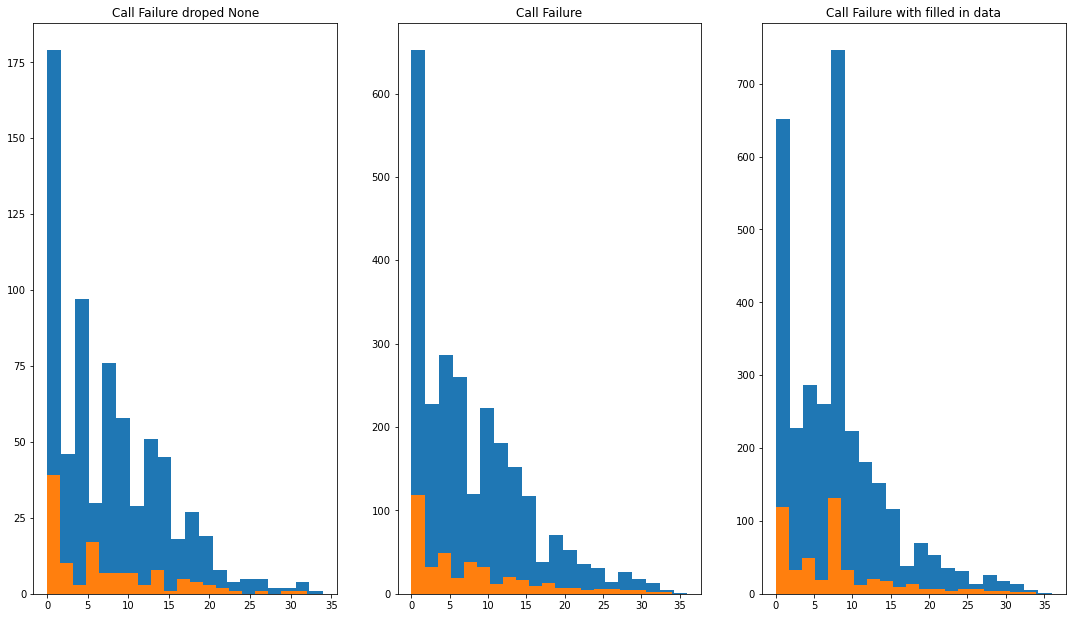

In [10]:
fig, axs = plt.subplots(1, 3)
axs[0].hist(data_analys_df['Call Failure'], bins = 20)
axs[0].hist(data_analys_df['Call Failure'][data_analys_df['Churn'] == 1], bins = 20)
axs[0].set_title('Call Failure droped None')
axs[1].hist(df['Call Failure'], bins = 20)
axs[1].hist(df['Call Failure'][df['Churn'] == 1], bins = 20)
axs[1].set_title('Call Failure')
axs[2].hist(new_df['Call Failure'], bins = 20)
axs[2].hist(new_df['Call Failure'][new_df['Churn'] == 1], bins = 20)
axs[2].set_title('Call Failure with filled in data')
fig.set_size_inches(18.5, 10.5);

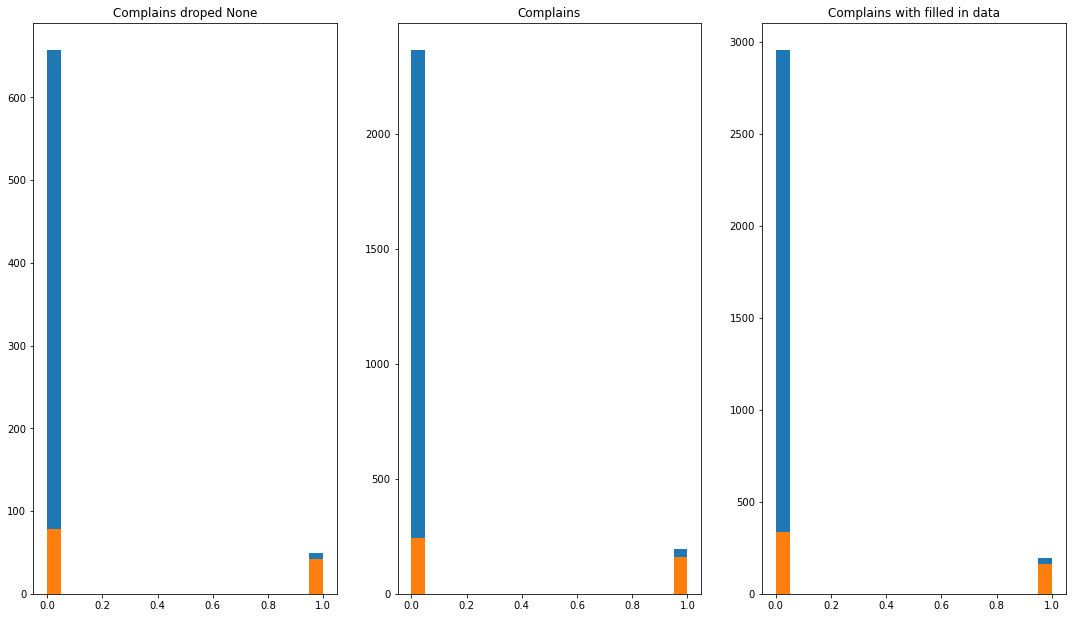

In [11]:
fig, axs = plt.subplots(1, 3)
axs[0].hist(data_analys_df['Complains'], bins = 20)
axs[0].hist(data_analys_df['Complains'][data_analys_df['Churn'] == 1], bins = 20)
axs[0].set_title('Complains droped None')
axs[1].hist(df['Complains'], bins = 20)
axs[1].hist(df['Complains'][df['Churn'] == 1], bins = 20)
axs[1].set_title('Complains')
axs[2].hist(new_df['Complains'], bins = 20)
axs[2].hist(new_df['Complains'][new_df['Churn'] == 1], bins = 20)
axs[2].set_title('Complains with filled in data')
fig.set_size_inches(18.5, 10.5);

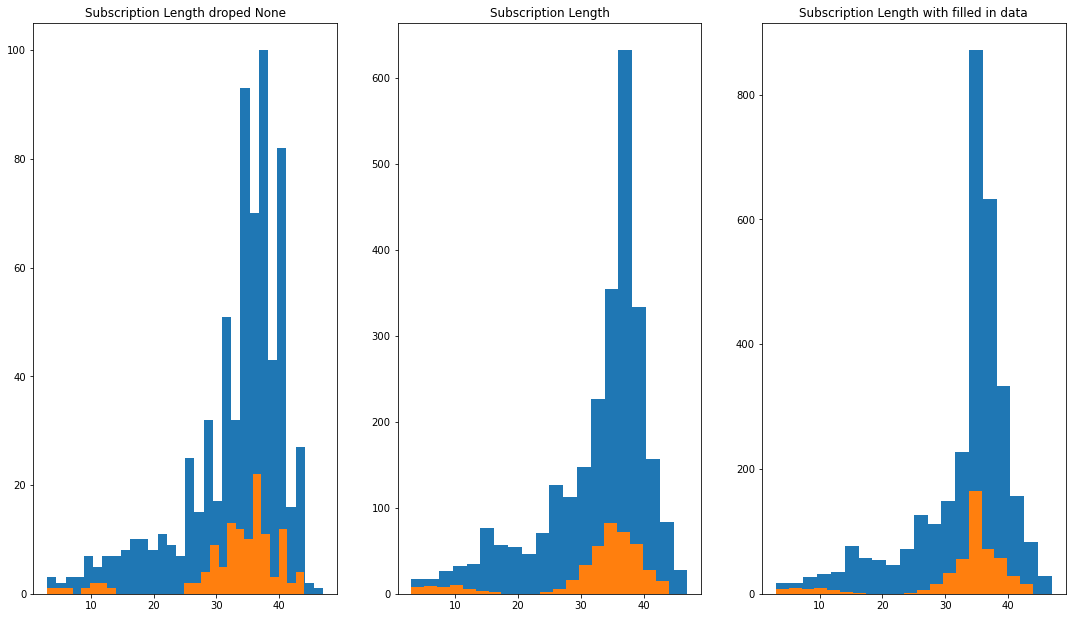

In [12]:
fig, axs = plt.subplots(1, 3)
axs[0].hist(data_analys_df['Subscription Length'], bins = 30)
axs[0].hist(data_analys_df['Subscription Length'][data_analys_df['Churn'] == 1], bins = 30)
axs[0].set_title('Subscription Length droped None')
axs[1].hist(df['Subscription Length'], bins = 20)
axs[1].hist(df['Subscription Length'][df['Churn'] == 1], bins = 20)
axs[1].set_title('Subscription Length')
axs[2].hist(new_df['Subscription Length'], bins = 20)
axs[2].hist(new_df['Subscription Length'][new_df['Churn'] == 1], bins = 20)
axs[2].set_title('Subscription Length with filled in data')
fig.set_size_inches(18.5, 10.5);

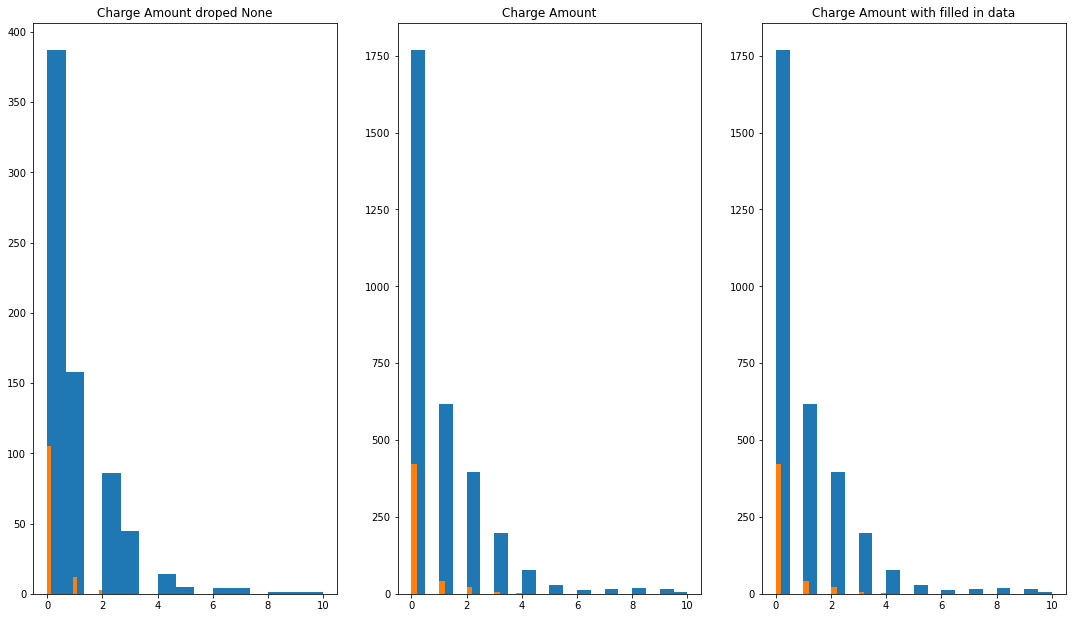

In [13]:
fig, axs = plt.subplots(1, 3)
axs[0].hist(data_analys_df['Charge Amount'], bins = 15)
axs[0].hist(data_analys_df['Charge Amount'][data_analys_df['Churn'] == 1], bins = 15)
axs[0].set_title('Charge Amount droped None')
axs[1].hist(df['Charge Amount'], bins = 20)
axs[1].hist(df['Charge Amount'][df['Churn'] == 1], bins = 20)
axs[1].set_title('Charge Amount')
axs[2].hist(new_df['Charge Amount'], bins = 20)
axs[2].hist(new_df['Charge Amount'][new_df['Churn'] == 1], bins = 20)
axs[2].set_title('Charge Amount with filled in data')
fig.set_size_inches(18.5, 10.5);

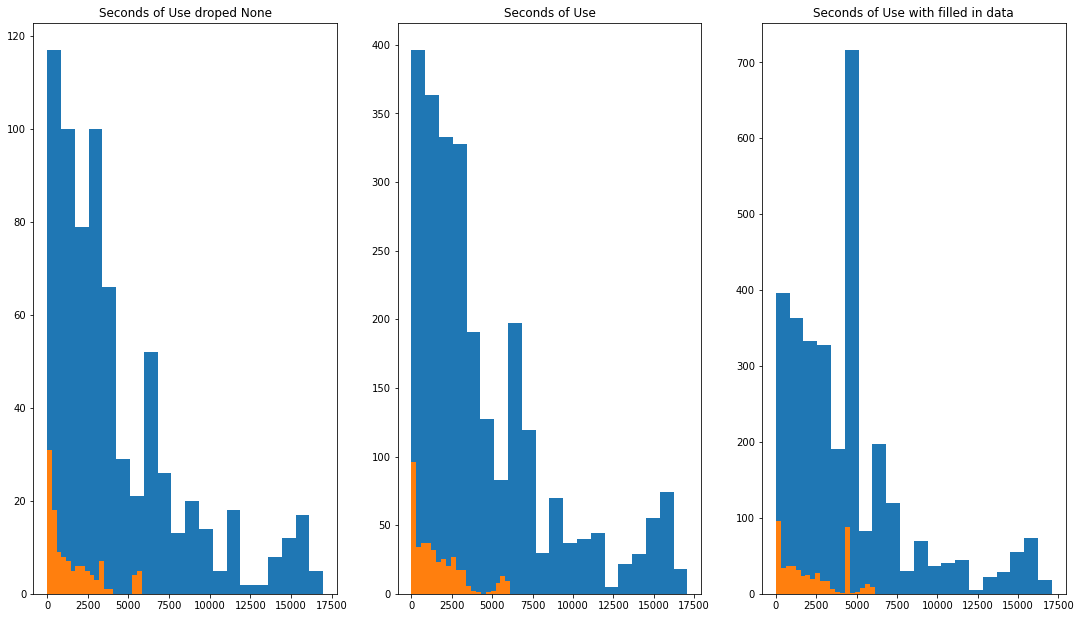

In [14]:
fig, axs = plt.subplots(1, 3)
axs[0].hist(data_analys_df['Seconds of Use'], bins = 20)
axs[0].hist(data_analys_df['Seconds of Use'][data_analys_df['Churn'] == 1], bins = 20)
axs[0].set_title('Seconds of Use droped None')
axs[1].hist(df['Seconds of Use'], bins = 20)
axs[1].hist(df['Seconds of Use'][df['Churn'] == 1], bins = 20)
axs[1].set_title('Seconds of Use')
axs[2].hist(new_df['Seconds of Use'], bins = 20)
axs[2].hist(new_df['Seconds of Use'][new_df['Churn'] == 1], bins = 20)
axs[2].set_title('Seconds of Use with filled in data')
fig.set_size_inches(18.5, 10.5);

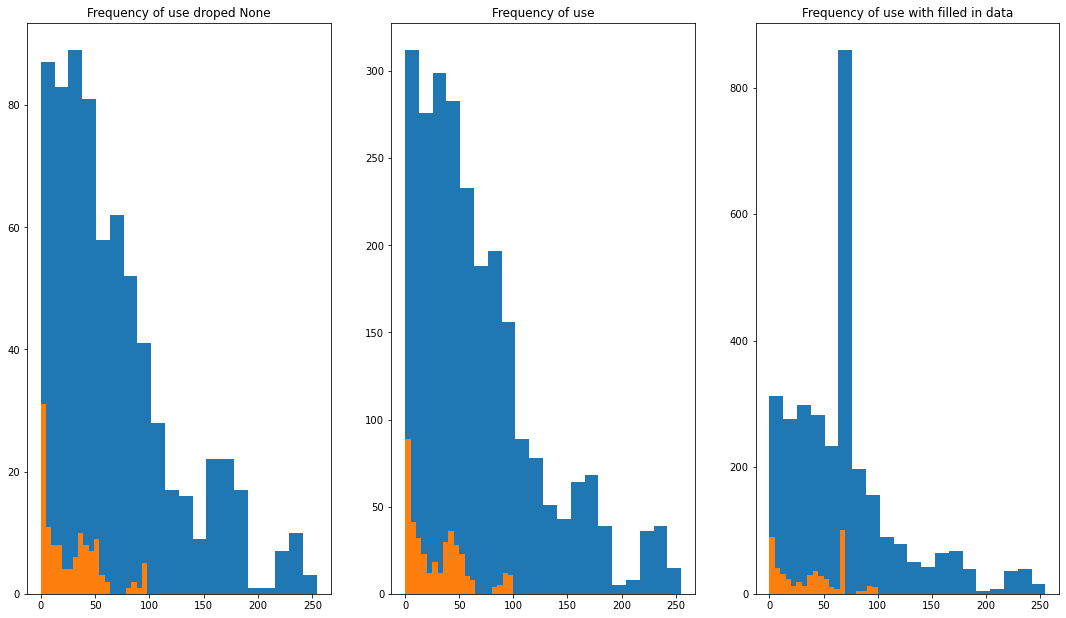

In [15]:
fig, axs = plt.subplots(1, 3)
axs[0].hist(data_analys_df['Frequency of use'], bins = 20)
axs[0].hist(data_analys_df['Frequency of use'][data_analys_df['Churn'] == 1], bins = 20)
axs[0].set_title('Frequency of use droped None')
axs[1].hist(df['Frequency of use'], bins = 20)
axs[1].hist(df['Frequency of use'][df['Churn'] == 1], bins = 20)
axs[1].set_title('Frequency of use')
axs[2].hist(new_df['Frequency of use'], bins = 20)
axs[2].hist(new_df['Frequency of use'][new_df['Churn'] == 1], bins = 20)
axs[2].set_title('Frequency of use with filled in data')
fig.set_size_inches(18.5, 10.5);

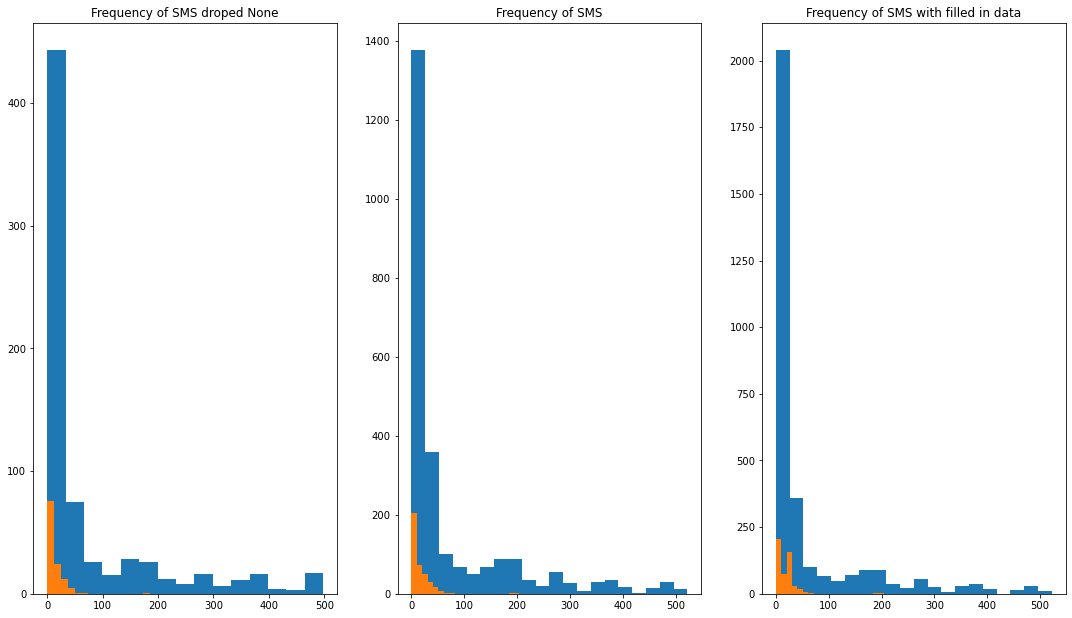

In [16]:
fig, axs = plt.subplots(1, 3)
axs[0].hist(data_analys_df['Frequency of SMS'], bins = 15)
axs[0].hist(data_analys_df['Frequency of SMS'][data_analys_df['Churn'] == 1], bins = 15)
axs[0].set_title('Frequency of SMS droped None')
axs[1].hist(df['Frequency of SMS'], bins = 20)
axs[1].hist(df['Frequency of SMS'][df['Churn'] == 1], bins = 20)
axs[1].set_title('Frequency of SMS')
axs[2].hist(new_df['Frequency of SMS'], bins = 20)
axs[2].hist(new_df['Frequency of SMS'][new_df['Churn'] == 1], bins = 20)
axs[2].set_title('Frequency of SMS with filled in data')
fig.set_size_inches(18.5, 10.5);

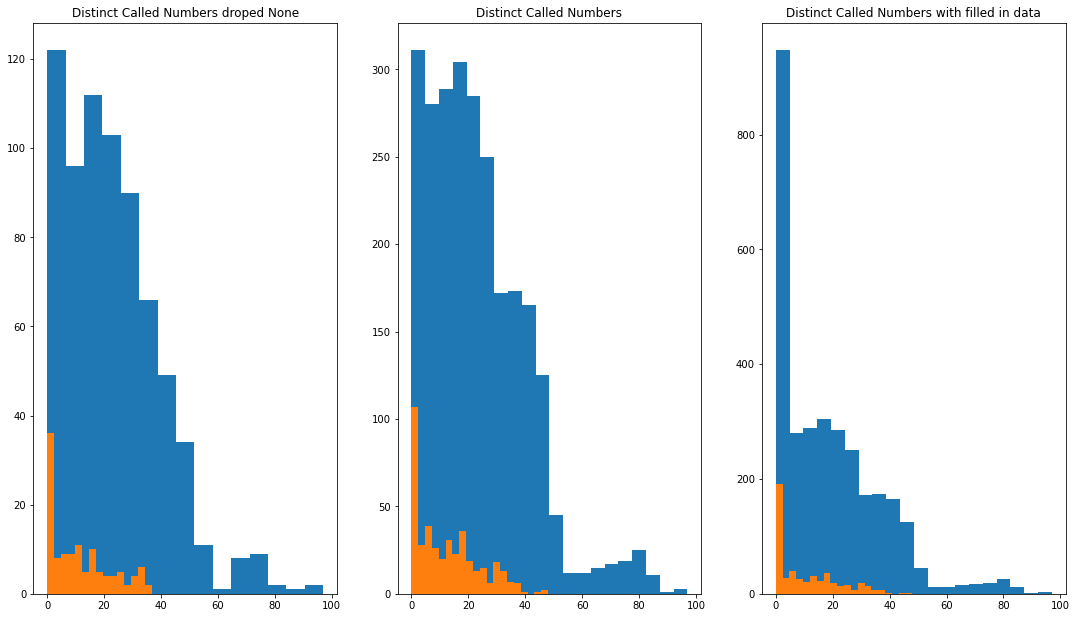

In [17]:
fig, axs = plt.subplots(1, 3)
axs[0].hist(data_analys_df['Distinct Called Numbers'], bins = 15)
axs[0].hist(data_analys_df['Distinct Called Numbers'][data_analys_df['Churn'] == 1], bins = 15)
axs[0].set_title('Distinct Called Numbers droped None')
axs[1].hist(df['Distinct Called Numbers'], bins = 20)
axs[1].hist(df['Distinct Called Numbers'][df['Churn'] == 1], bins = 20)
axs[1].set_title('Distinct Called Numbers')
axs[2].hist(new_df['Distinct Called Numbers'], bins = 20)
axs[2].hist(new_df['Distinct Called Numbers'][new_df['Churn'] == 1], bins = 20)
axs[2].set_title('Distinct Called Numbers with filled in data')
fig.set_size_inches(18.5, 10.5);

На основе этих данных, могу сказать что отток среди новых пользователей высок, что логично потому-что большинство ушедших наверно пользовались другим оператором и скорее всего решили просто попробовать и перестают использовать по разным факторам.

Меня больше превлекло отток клиентов с подпиской от 30 до 40 месяцев. В период их испльзования есть интересные факторы :) Более детально о моих доводах и гипотез могу рассказать на собеседовании )
